In [41]:
import pandas as pd, seaborn as sns, numpy as np
from pylab import subplots, show, tight_layout, xlim, savefig

In [44]:
Repeats = pd.read_csv('../data/DataFrame/Repeats.tsv', sep = '\t')

plotting fish genome size vs. variables

In [45]:
def abline(intercept, slope, ax):
    """Plot a line from slope and intercept"""
    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + slope * x_vals
    ax.plot(x_vals, y_vals, '--', lw = 5)

without outliers

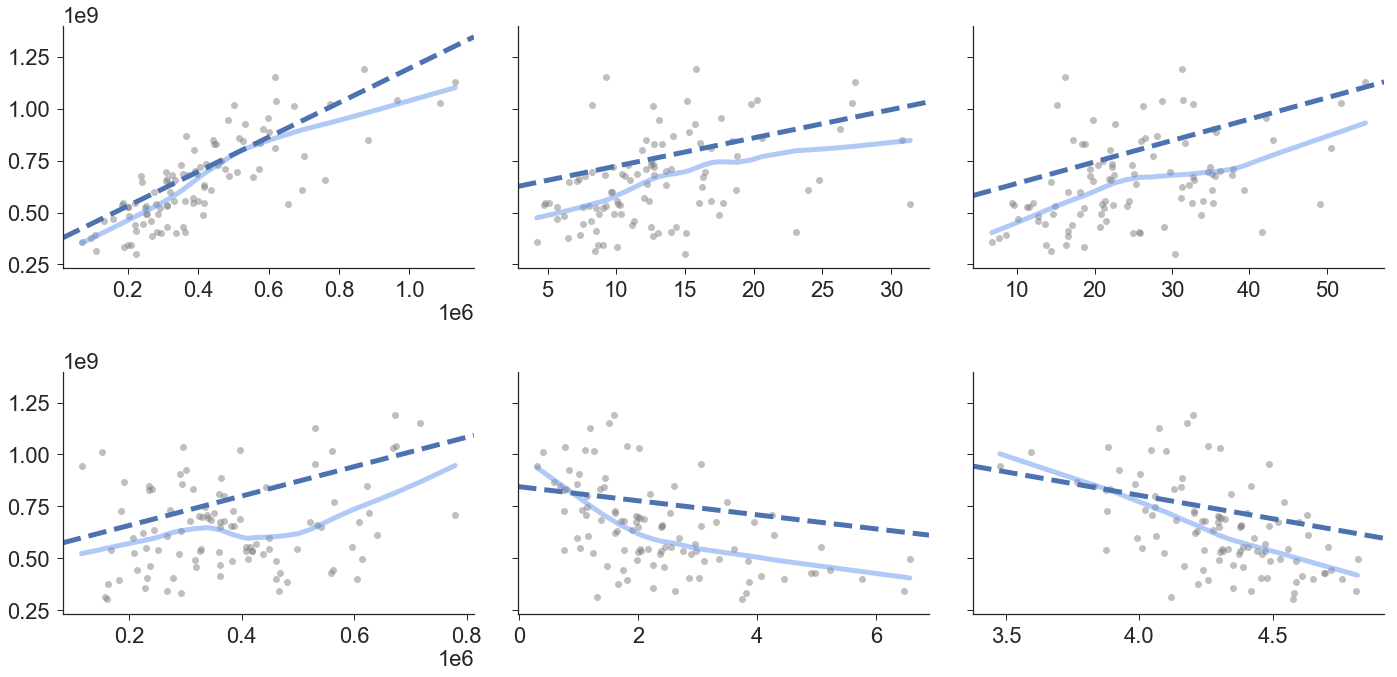

In [46]:
f, axes = subplots(nrows = 2, ncols = 3, figsize = (20, 10), sharey = True, sharex = False)
axes = axes.flatten()

# Drop Salmo salar and Zebrafish
dat = Repeats[~Repeats.species.isin(['Salmo salar', 'Danio rerio'])]

# Slopes and intercepts from PGSL in R

s_i = {'nTEs' : (3.656e+08, 8.289e+02),
       'TEs' : (587359533, 13614565 ),
       'Total': (537693190, 10302483),
       'num_strs_unit10' : (5.169e+08, 7.079e+02),
       'strs_perc' : (844535390, -33799796),
       'log_strs' : (1705577588, -225604943)}

c = -1

asm_size = 'bp'

line_kws = {'lw' : 5, 'color' : 'cornflowerblue', 'alpha' : 0.5}
scatter_kws = {'color' : 'gray', 'alpha' : 0.5}
for var in ['nTEs', 'TEs', 'Total', 'num_strs_unit10', 'strs_perc', 'log_strs']:
    c += 1
    ax = axes[c]
    x = np.array(dat[var])
    y = np.array(dat['bp'])
    sns.set(font_scale=2.2, style = 'ticks')
    sns.regplot(ax = ax, x = x, y = y, scatter = True, fit_reg = False, scatter_kws=scatter_kws)
    sns.regplot(ax = ax, x = x, y = y, scatter = False, lowess = True, color = 'gray', line_kws = line_kws)
    if c == 5:
        xlim(min(dat[var]) - 0.1, max(dat[var]) + 0.1)
    abline(s_i[var][0], s_i[var][1], ax)
c = -1
for ax in f.get_axes():
    c += 1
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    if c in [0, 3]:
        ax.ticklabel_format(style='sci', axis='x', scilimits=(1, 1))
tight_layout()
savefig('../figures/genomesize_regressions.pdf', type = 'pdf', transparent = True)
savefig('../figures/genomesize_regressions.png', type = 'png', transparent = True, dpi = 300)


show()

With outliers

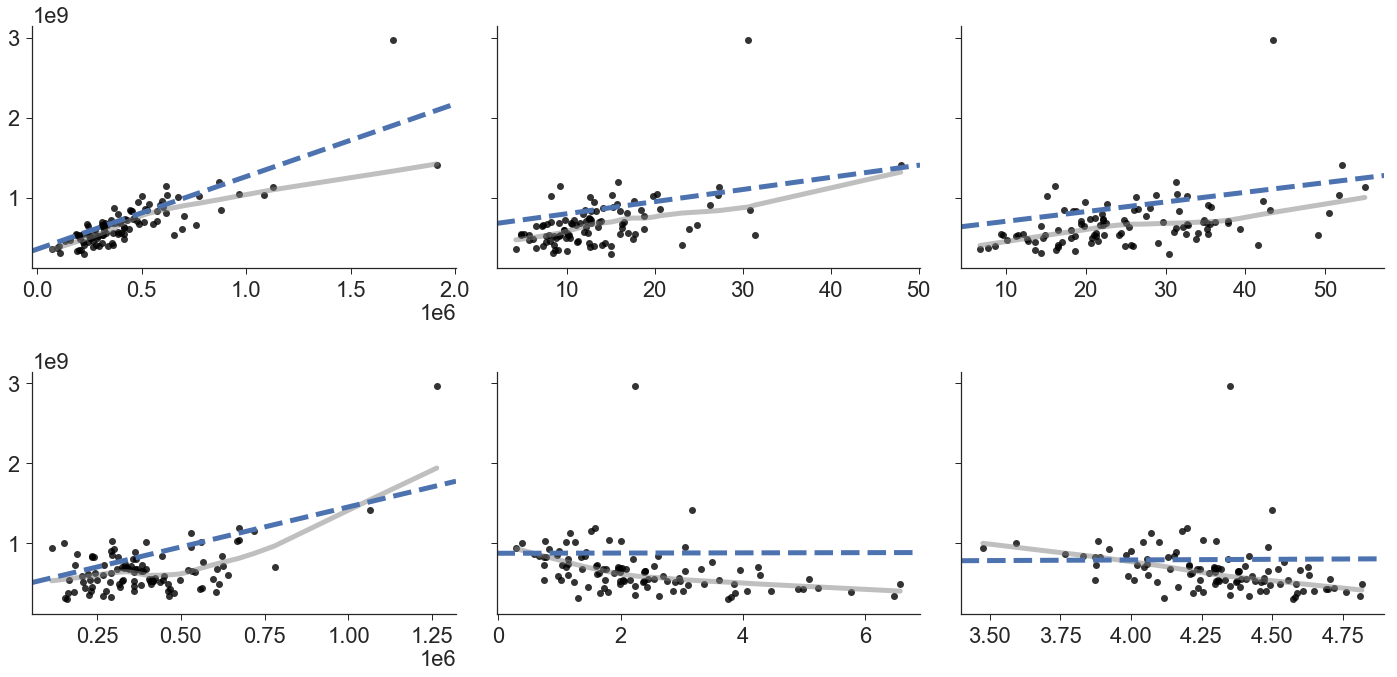

In [8]:
f, axes = subplots(nrows = 2, ncols = 3, figsize = (20, 10), sharey = True, sharex = False)
axes = axes.flatten()

# Drop Salmo salar and Zebrafish
# Dont drop Salmo and Zebrafish
dat = Repeats

# Slopes and intercepts from PGSL in R

s_i_outliers = {'nTEs' : (3.586e+08, 9.065e+02),
                'TEs' : (648810784, 15142817),
                'Total': (585418323, 12063355 ),
                'num_strs_unit10' : (455993904, 1001),
                'strs_perc' : (878063271, 1263041),
                'log_strs' : (731631457, 15744069)}


c = -1

asm_size = 'bp'

line_kws = {'lw' : 5, 'color' : 'gray', 'alpha' : 0.5}

for var in ['nTEs', 'TEs', 'Total', 'num_strs_unit10', 'strs_perc', 'log_strs']:
    c += 1
    ax = axes[c]
    x = np.array(dat[var])
    y = np.array(dat[asm_size])
    sns.set(font_scale=2.2, style = 'ticks')
    sns.regplot(ax = ax, x = x, y = y, scatter = True, fit_reg = False, color = 'black')
    sns.regplot(ax = ax, x = x, y = y, scatter = False, lowess = True, color = 'gray', line_kws = line_kws)
    abline(s_i_outliers[var][0], s_i_outliers[var][1], ax)
c = -1
for ax in f.get_axes():
    c += 1
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    if c in [0, 3]:
        ax.ticklabel_format(style='sci', axis='x', scilimits=(1, 1))
tight_layout()
show()

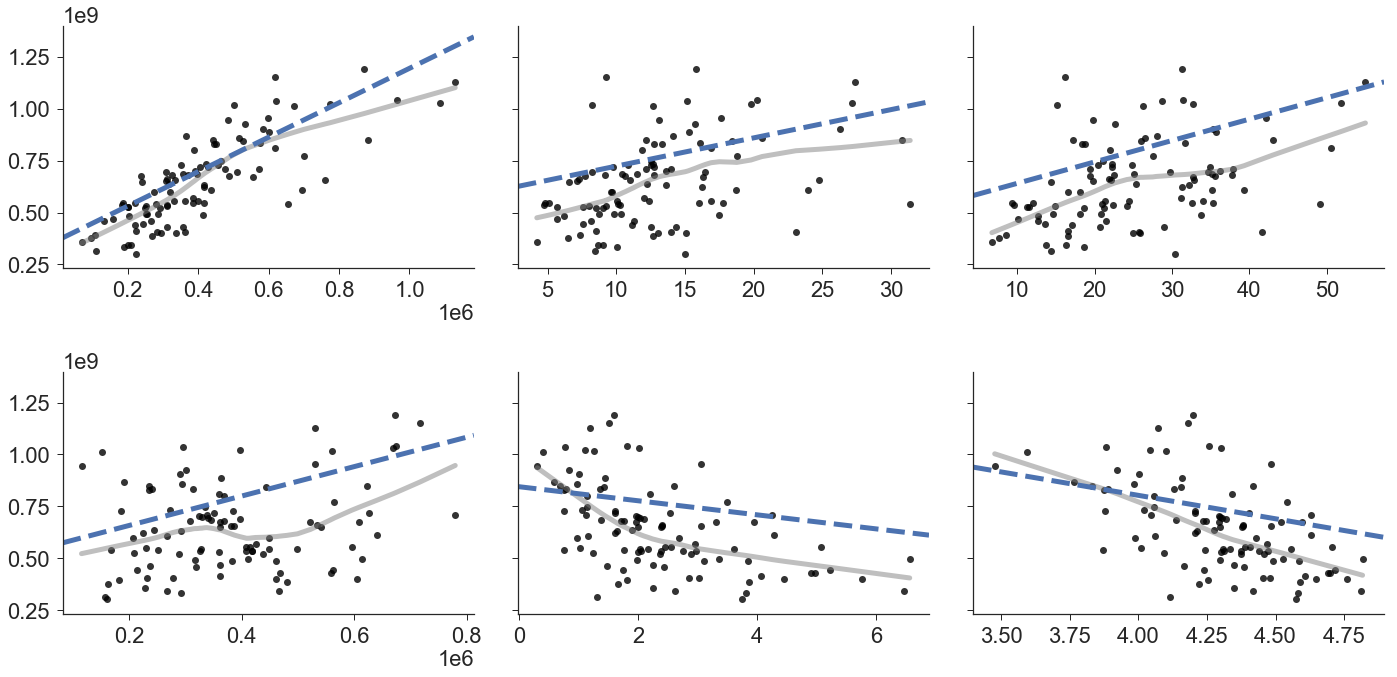

In [16]:
f, axes = subplots(nrows = 2, ncols = 3, figsize = (20, 10), sharey = True, sharex = False)
axes = axes.flatten()

# Drop Salmo salar and Zebrafish
dat = Repeats[~Repeats.species.isin(['Salmo salar', 'Danio rerio'])]

# Slopes and intercepts from PGSL in R

s_i = {'nTEs' : (3.656102e+08, 8.288907e+02),
       'TEs' : (587359533, 13614565 ),
       'Total': (537693190, 10302483),
       'num_strs_unit10' : (5.169e+08, 7.079e+02),
       'strs_perc' : (844535390, -33799796),
       'log_strs' : (1705577588, -225604943)}

c = -1

asm_size = 'bp'

line_kws = {'lw' : 5, 'color' : 'gray', 'alpha' : 0.5}

for var in ['nTEs', 'TEs', 'Total', 'num_strs_unit10', 'strs_perc', 'log_strs']:
    c += 1
    ax = axes[c]
    x = np.array(dat[var])
    y = np.array(dat[asm_size])
    sns.set(font_scale=2.2, style = 'ticks')
    sns.regplot(ax = ax, x = x, y = y, scatter = True, fit_reg = False, color = 'black')
    sns.regplot(ax = ax, x = x, y = y, scatter = False, lowess = True, color = 'gray', line_kws = line_kws)
    abline(s_i[var][0], s_i[var][1], ax)
c = -1
for ax in f.get_axes():
    c += 1
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    if c in [0, 3]:
        ax.ticklabel_format(style='sci', axis='x', scilimits=(1, 1))
tight_layout()
show()